## Data analysis

Load csv data into a dataframe, join them if necessary and print out their statistics 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_AIMD = pd.read_csv("Dist_AIMD.csv") 
df_MD = pd.read_csv('Dist_MD.csv')

print("Statistics of df_AIMD:\n", df_AIMD.describe())
print("Statistics of df_MD:\n", df_MD.describe())

Statistics of df_AIMD:
        Class        S-O1        S-O2        S-H1        S-H2        C-O1  \
count  209.0  209.000000  209.000000  209.000000  209.000000  209.000000   
mean     1.0    3.131561    3.290855    2.237417    2.460744    3.333806   
std      0.0    0.126235    0.142313    0.149111    0.207388    0.195531   
min      1.0    2.796671    2.909412    1.868232    1.974143    2.847722   
25%      1.0    3.045264    3.189464    2.125733    2.309476    3.203602   
50%      1.0    3.122334    3.282465    2.228132    2.437507    3.356571   
75%      1.0    3.216259    3.372334    2.329326    2.581130    3.489198   
max      1.0    3.585651    3.867862    2.758864    3.230786    3.777886   

             C-O2        C-H1        C-H2        N-O1        N-O2        N-H1  \
count  209.000000  209.000000  209.000000  209.000000  209.000000  209.000000   
mean     3.539312    2.559494    2.757437    2.830045    3.018328    1.893515   
std      0.152403    0.181098    0.131635    0.1

In [3]:
# Checking for NaN values

print('Number of NaN values in AIMD DF: {}'.format(df_AIMD.isna().sum().sum()))
print('Number of NaN values in AIMD DF: {}'.format(df_MD.isna().sum().sum()))

# If NaN values are indeed present, then we can either replace them with some value or drop the rows completely

def deal_with_na(df, fill_val=0.0, drop=True):
    
    if df.isnull().any(axis=None):
        if drop:
            print("Number of NaN values: ", df.isnull.sum().sum())
            df.dropna(inplace=True)
        else:
            df.fillna(fill_val, inplace=True)

Number of NaN values in AIMD DF: 0
Number of NaN values in AIMD DF: 0


## Description of the dataframes,

The dataframes contain the distances of the closest two oxygens and hydrogens from the S, C, and N atoms for MD and AIMD snapshots. In each dataframe we have a column named "ClassName" which describes which class the distances belong to, i.e., MD or AIMD. We also have a column named "Class" which is 1 for AIMD and 0 for MD.

Next, we concatenate the two dataframes and shuffle the final dataframe. 

In [4]:
from sklearn.utils import shuffle

df_fin = pd.concat([df_AIMD, df_MD])
df_shuffle = shuffle(df_fin, random_state=0)

df_shuffle.head()


,Class,ClassName,S-O1,S-O2,S-H1,S-H2,C-O1,C-O2,C-H1,C-H2,N-O1,N-O2,N-H1,N-H2
200,0,MD,3.058644,3.268839,2.127982,2.398241,2.880752,3.231719,2.107106,2.465597,2.722132,2.823587,1.790810,1.919631
170,1,AIMD,3.249995,3.263349,2.265893,2.361130,3.094923,3.190536,2.335263,2.485889,2.854410,2.938808,1.871487,2.033413
15,0,MD,2.914829,2.965123,2.012212,2.158510,2.984337,3.054808,2.247004,2.361860,2.715118,2.766487,1.803254,1.861320
181,0,MD,2.874340,3.234227,1.969793,2.422937,3.453376,3.579303,2.573053,2.658360,2.732942,2.971228,1.791051,2.060111
99,0,MD,2.998400,3.009045,2.113534,2.155761,3.038301,3.043577,2.177829,2.206199,2.713162,2.785390,1.798333,1.852806


In [5]:
# To confirm how many unique values we have for both Classes, i.e. MD and AIMD

print("Number of unique classes in the shuffled df: \n",df_shuffle['ClassName'].value_counts())

Number of unique classes in the shuffled df: 
 AIMD    209
MD      208
Name: ClassName, dtype: int64


## Scatter matrix

Important tool to visualize the data points in the dataframe, especially if the task is classification. 

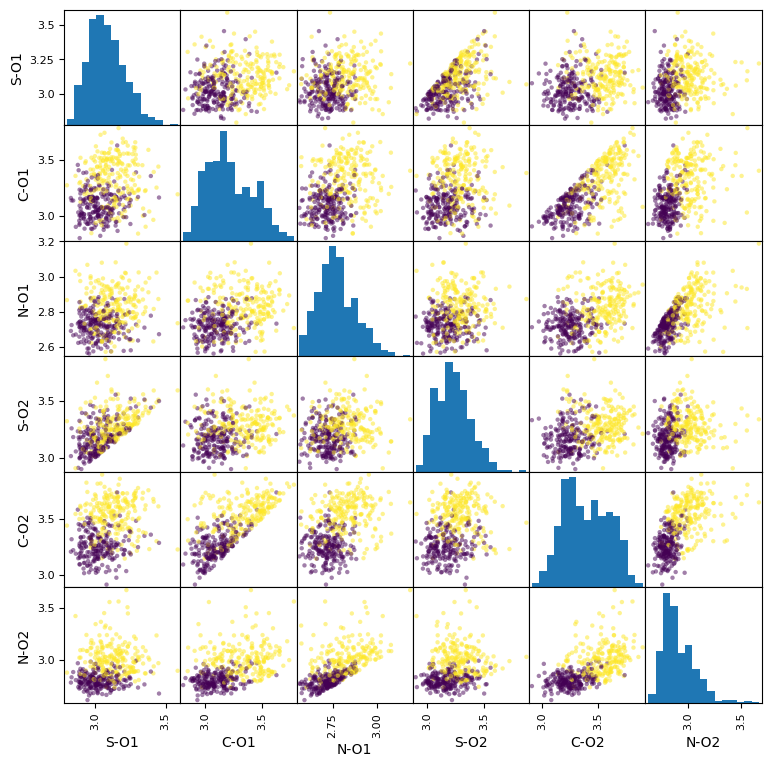

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from pandas.plotting import scatter_matrix

#Only inluding the closest O distances
X_O = df_shuffle[['S-O1', 'C-O1', 'N-O1', 'S-O2', 'C-O2', 'N-O2']]
y = df_shuffle['Class']

scatter = scatter_matrix(X_O, c=y, marker = '.', s=40, hist_kwds={'bins':15}, figsize=(9,9))
#new_labels = [round(float(i.get_text()), 2) for i in scatter[0,0].get_yticklabels()]
#scatter[0,0].set_yticklabels(new_labels)
#plt.figure()
#plt.imshow([np.unique(y_train)])
#_ = plt.xticks(ticks=np.unique(y_train),labels=['MD', 'AIMD'])


## Description of the scatter matrix

The scatter matrix shows each feature (the distances) are well separated among the classes, which makes classification simpler. If the features were not well seprated, we should consider not including them in our learning data. The diagonal of the scatter matrix shows the histogram of each feature, but we can also plot the density (see [scatter_matrix](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)).

Next, let's take the see the scatter matrix where only the closest two hydrogens are included. 

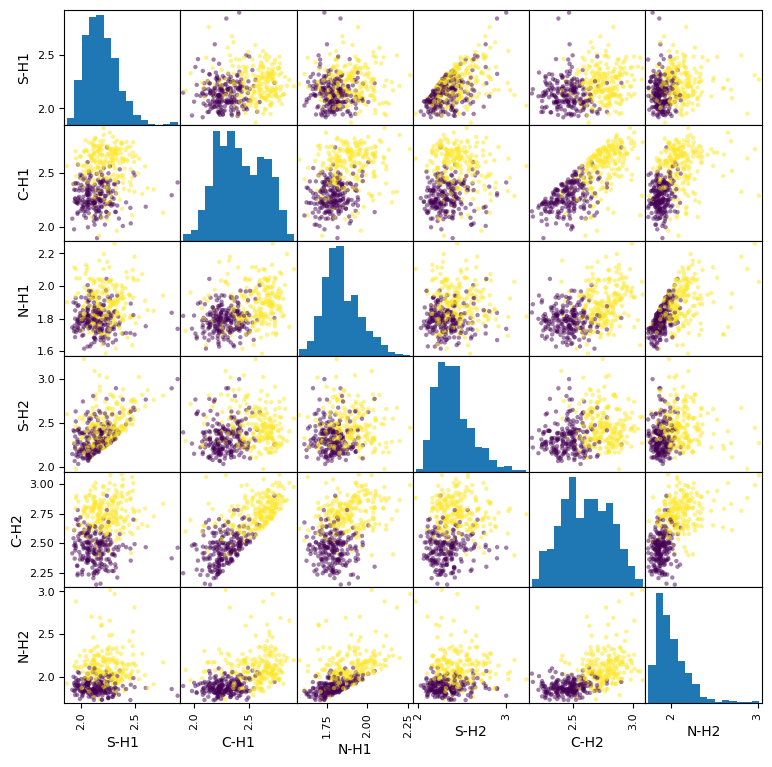

In [7]:
X_H = df_shuffle[['S-H1', 'C-H1', 'N-H1', 'S-H2', 'C-H2', 'N-H2']]

scatter = scatter_matrix(X_H, c=y, marker = '.', s=40, hist_kwds={'bins':15}, figsize=(9,9))

## Additional comments

The closest H scatter matrix looks remarkably similar to the previous scatter matrix and that is because the closest H and closest O usually belong to one water molecule and hence are correlated. In learning algorithms we will use both the features separately and check if there are any differences in predictions. 

# Correlation in the dataset

Different ML models deal with correlated features differently, but it is always a good idea to see if out dataset has extremely correlated features. We will use [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) and plot a heatmap to show this. 

### A few comments on the Pearson correlation first, 
1. Two variables are said to be positively correlated if one increases and so does the other and negatively correlated if the opposite happens. 

2. The Pearson correlation coefficient can be, 
- +1 : Perfectly positively correlated
- 0: No correlation
- -1: Perfectly negative correlation

3. Our dataset involves distances between S, C, and N atoms and the closest two oxygens and hydrogens to each of them. We should not see ANY negative correlation, but we can predict positive correlations. 

4. The X-O and X-H (where X = S, C, or N) should be positively correlated since they usually belong to the same water molecule. 

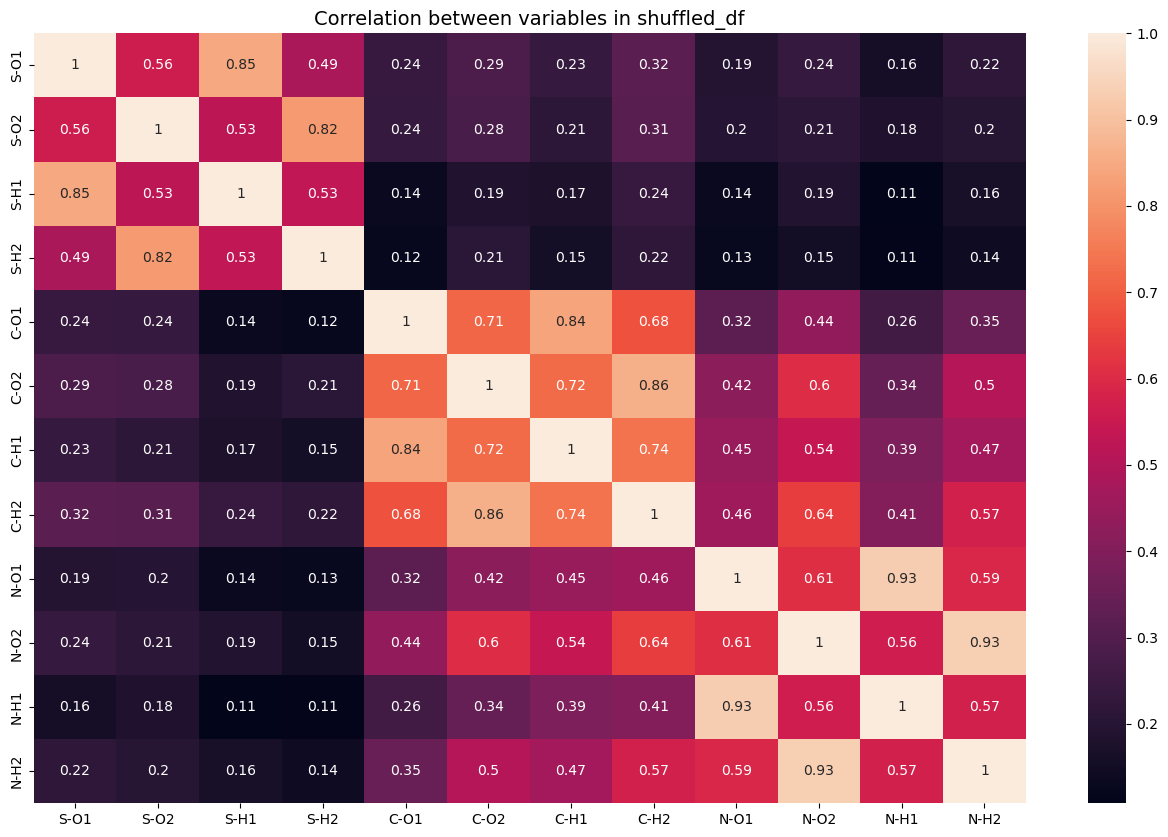

In [8]:
# Pandas has the method called corr which calculates correlation between all columns 
corr = df_shuffle.iloc[:,2:].corr()

#corr is a dataframe that contains the Pearson correlation coefficient of all columns 
#and we can visualize it using a heatmap
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, fmt='.2g')
plt.title('Correlation between variables in shuffled_df', fontsize=14)

plt.show()

### The plot above is informative and we will go through it step by step,
1. The heatmap seems to be cleanly divided into two main regions (3 if we look closely): 
- S-O1, S-O2, S-H1, S-H2 
> This means the S-X (where X: O,H) distances are only correlated among each other and not with other distances. Even among the S distances, {S-H1, S-O1} and  {S-H2, S-O2} are the only sets highly correlated as predicted. But the rest are weakly correlated
- The rest of the distances
> We can make out that there is a weak correlation between C distances and N distances (stronger than S distance correlation with the rest but it is small enough to be ignored).

2. The C and N distances behave similarly to S but in case of N, {N-O1, N-H1} and {N-O2, N-H2} sets are extremely highly correlated, which implies that they are from the same water molecule. 

We can drop one of the two features which are highly correlated but since we will be separating the X-O and X-H datasets, we have already eliminated that issue. In a later notebook, we will deal with this issue and other methods of feature engineering.  

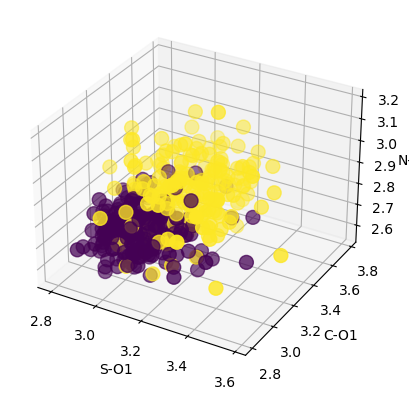

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_O['S-O1'], X_O['C-O1'], X_O['N-O1'], c = y, marker = 'o', s=100)
ax.set_xlabel('S-O1')
ax.set_ylabel('C-O1')
ax.set_zlabel('N-O1')
plt.show()

# For this project we will explore several ML classification algorithms using scikit-learn,
1. K nearest neighbors
2. Logistic regression
3. Support Vector Machines
4. Decision trees 
5. Naive Bayes 
6. Random Forests and Gradient Boosted Decision trees
7. Neural Networks

### Each method will have its own notebook and we will test their accuracy, introduce concepts unique to them, and concepts in general useful to consider when using any ML model.